<a href="https://colab.research.google.com/github/wjdolan/DS_Portfolio/blob/main/tSNE_UMAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Comparing dimensionality reduction techniques**

In [9]:
# !pip install flameplot
# !pip install umap-learn[plot]

In [13]:
# Load general libraries
import numpy as np
from sklearn import manifold, decomposition
from umap import UMAP

# Import flameplot to compare results btw DR techniques
import flameplot as flameplot

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)


Import dataset [digits]


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


(<Figure size 1800x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f6f1d95b210>)

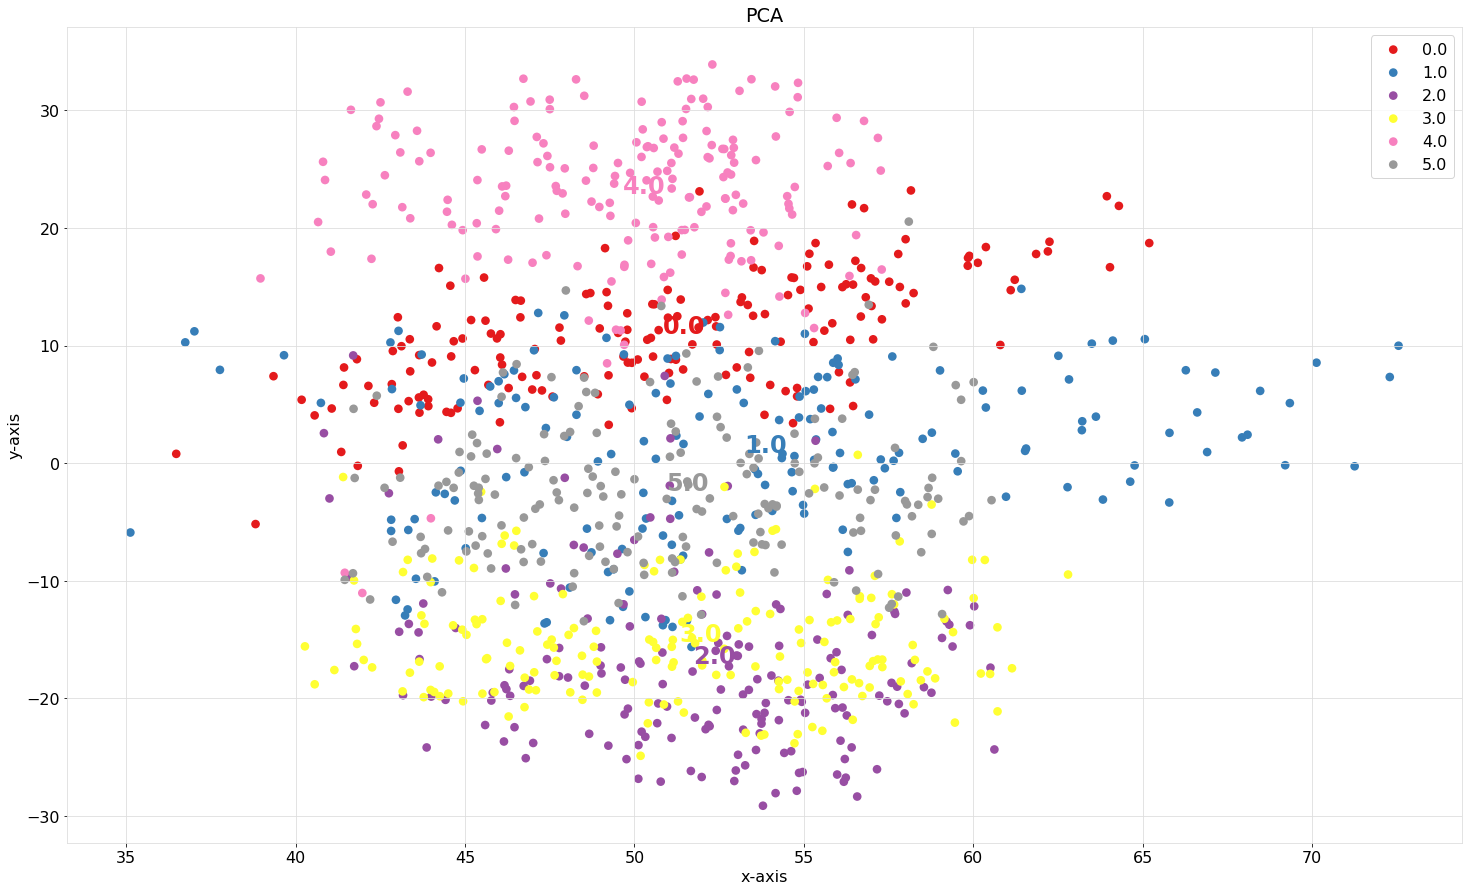

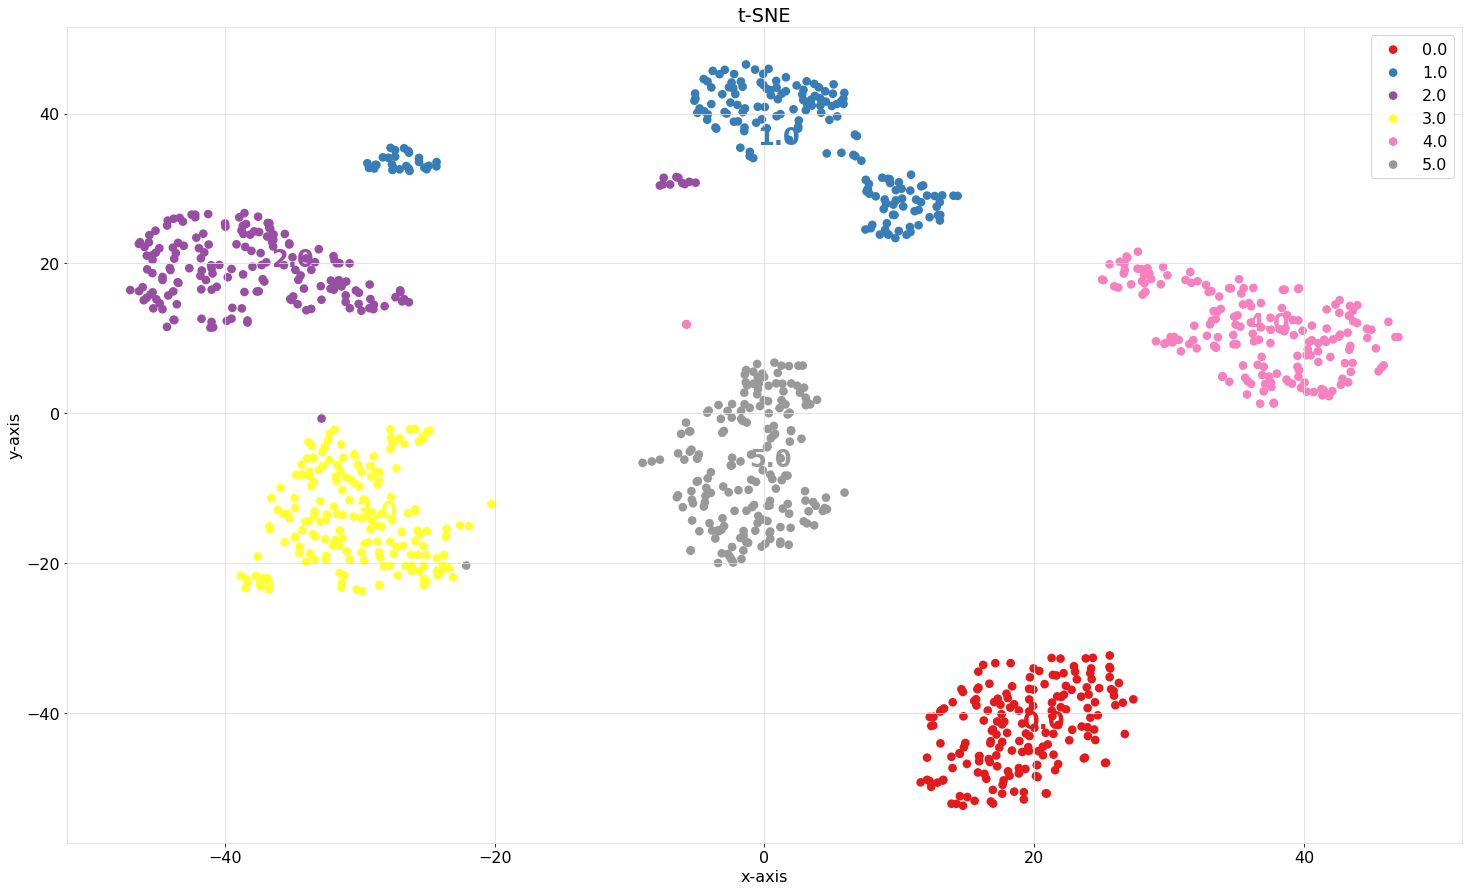

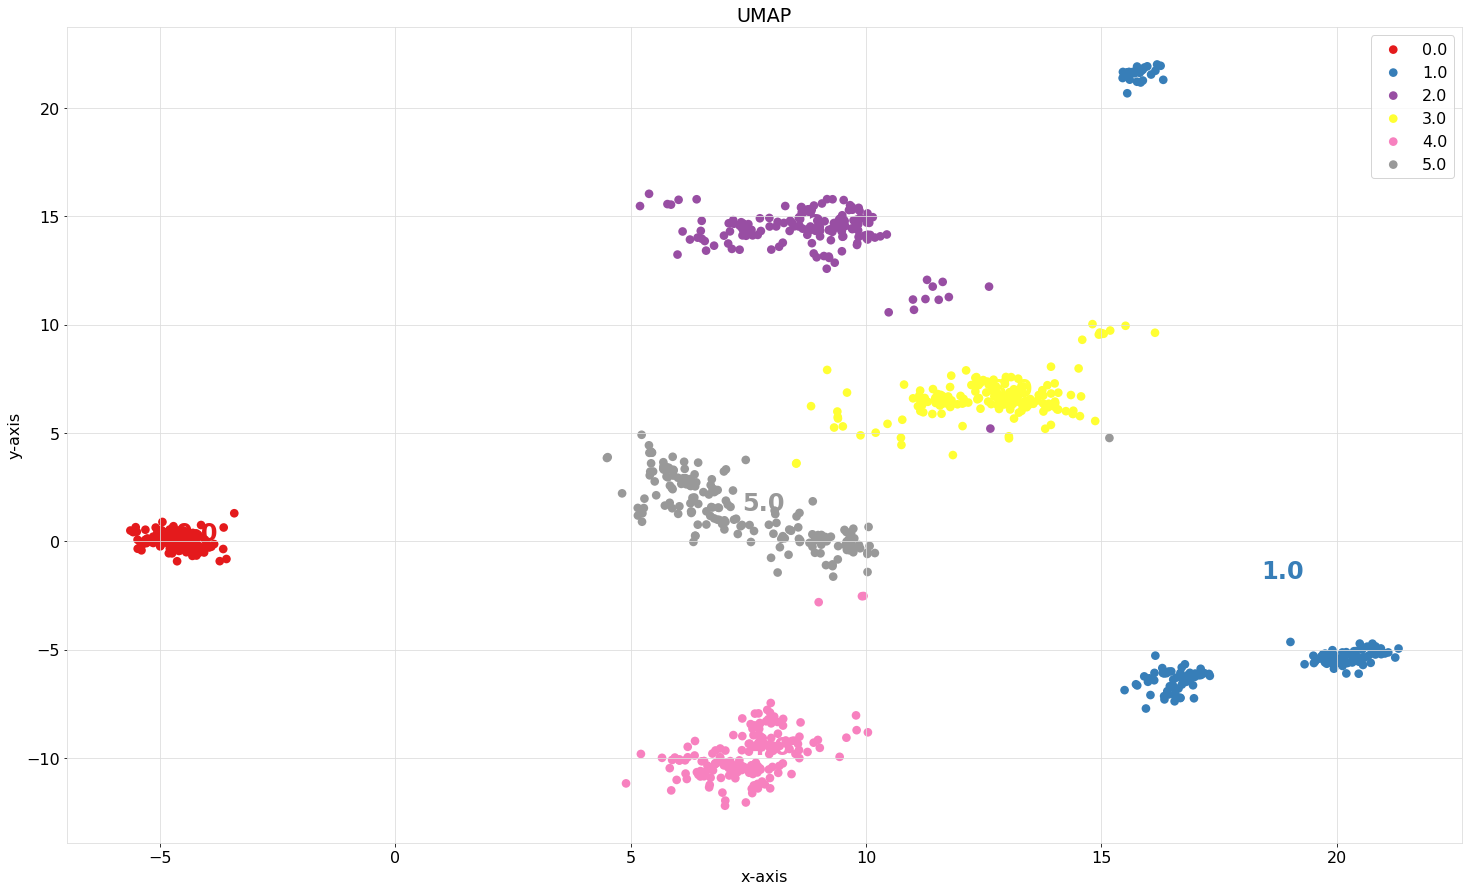

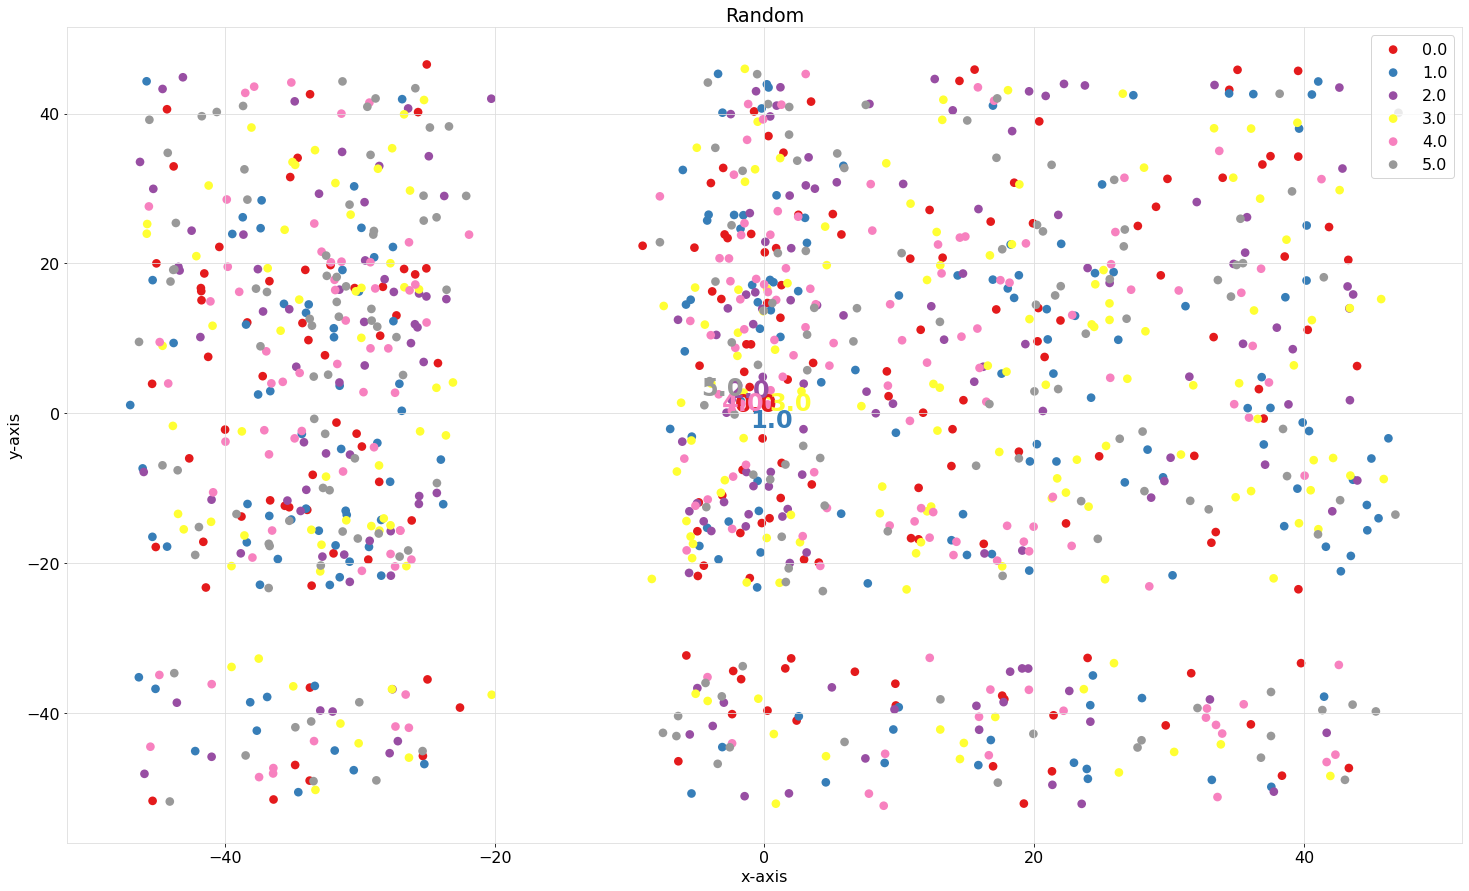

In [14]:
# Load mnist example data
X, y = flameplot.import_example()

# PCA: 50 PCs
map_pca = decomposition.TruncatedSVD(n_components=50).fit_transform(X)
# tSNE: 2D
map_tsne = manifold.TSNE(n_components=2, init='pca').fit_transform(X)
# UMAP: 2D
map_umap = UMAP(densmap=True).fit_transform(X)
# Random
map_rand=np.c_[np.random.permutation(map_tsne[:,0]), np.random.permutation(map_tsne[:,1])]

# Scatter
flameplot.scatter(map_pca[:,0], map_pca[:,1], labels=y, s=75, title='PCA')
flameplot.scatter(map_tsne[:,0], map_tsne[:,1], labels=y, s=75, title='t-SNE')
flameplot.scatter(map_umap[:,0], map_umap[:,1], labels=y, s=75, title='UMAP')
flameplot.scatter(map_rand[:,0], map_rand[:,1], labels=y, s=75, title='Random')

100%|██████████| 50/50 [01:37<00:00,  1.96s/it]


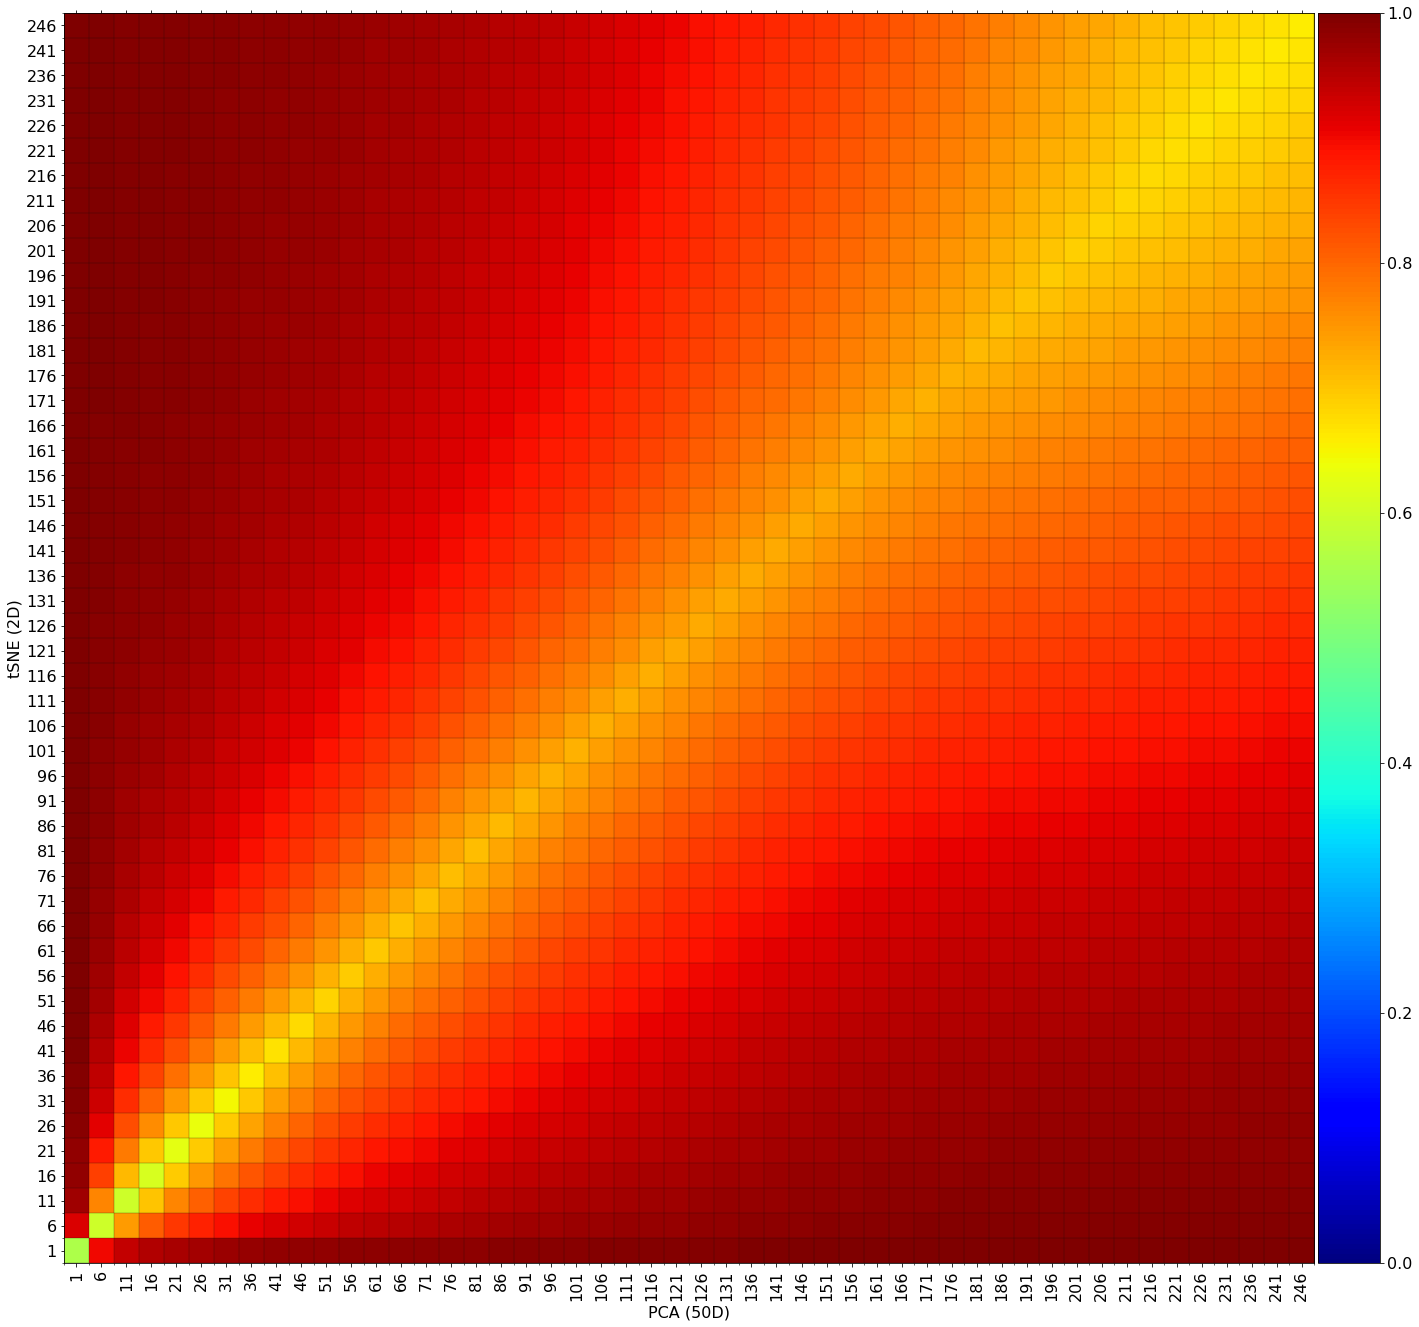

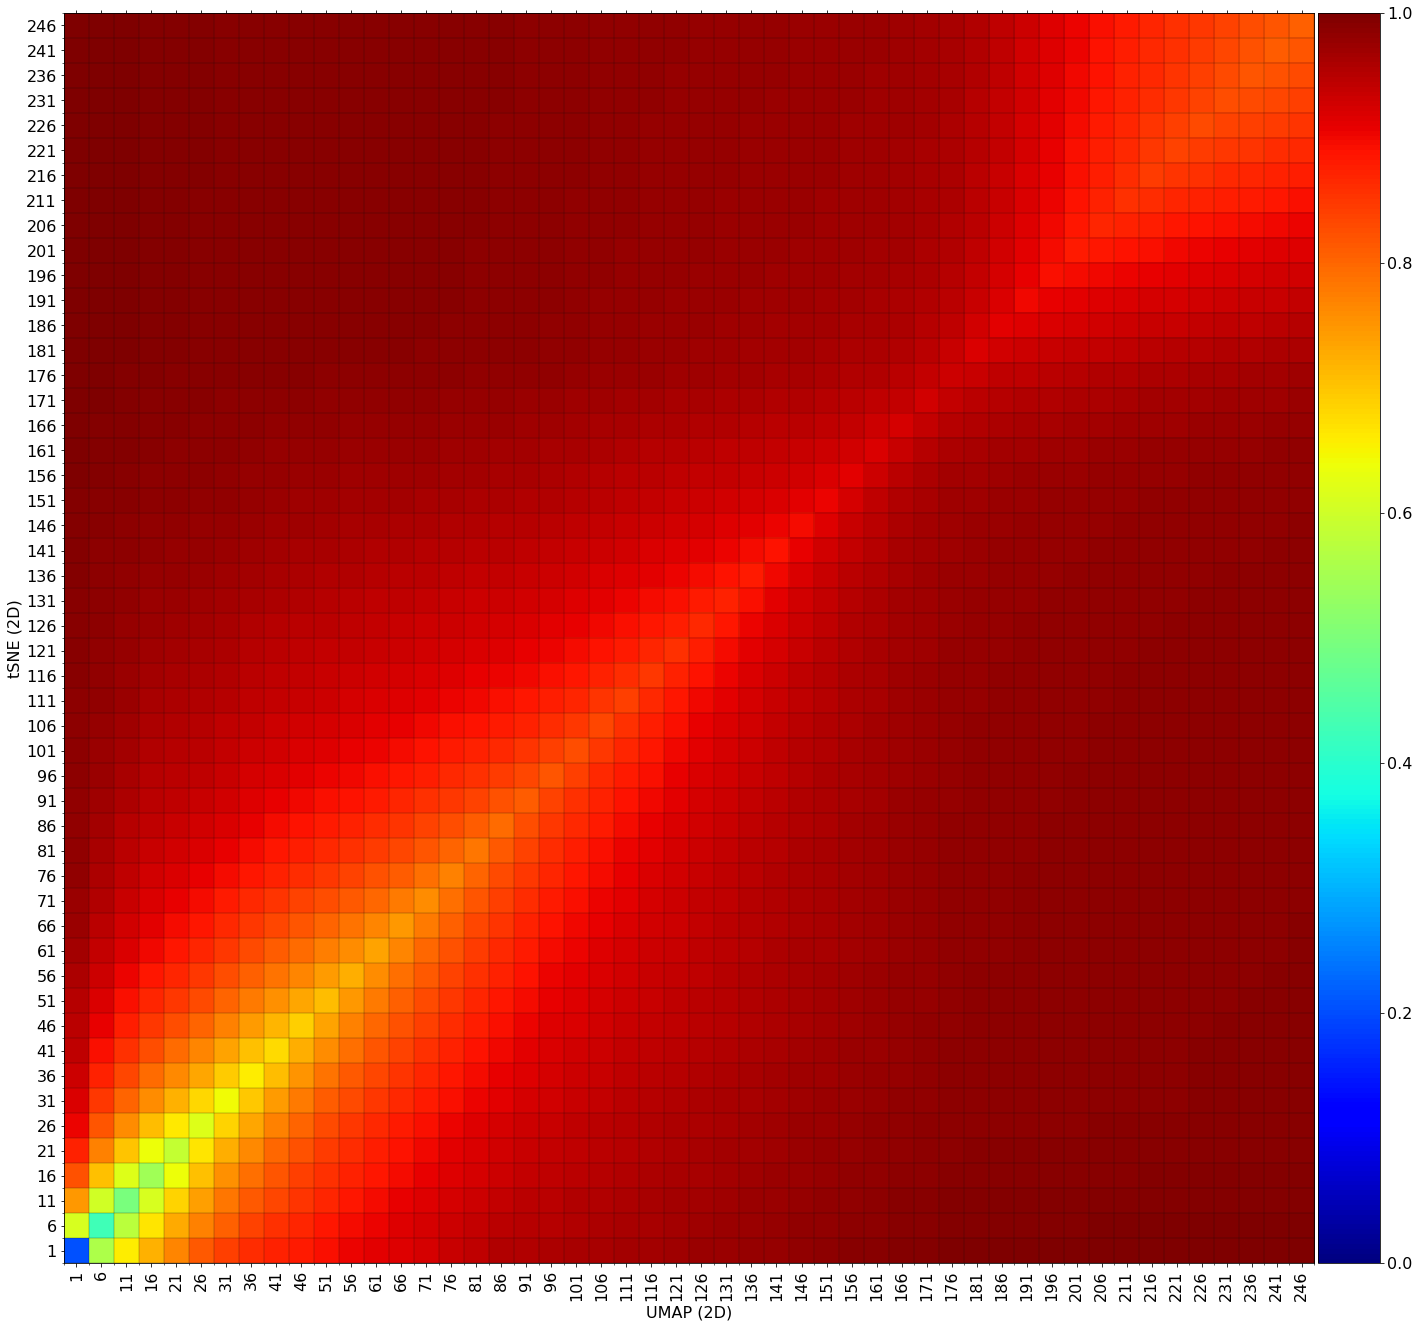

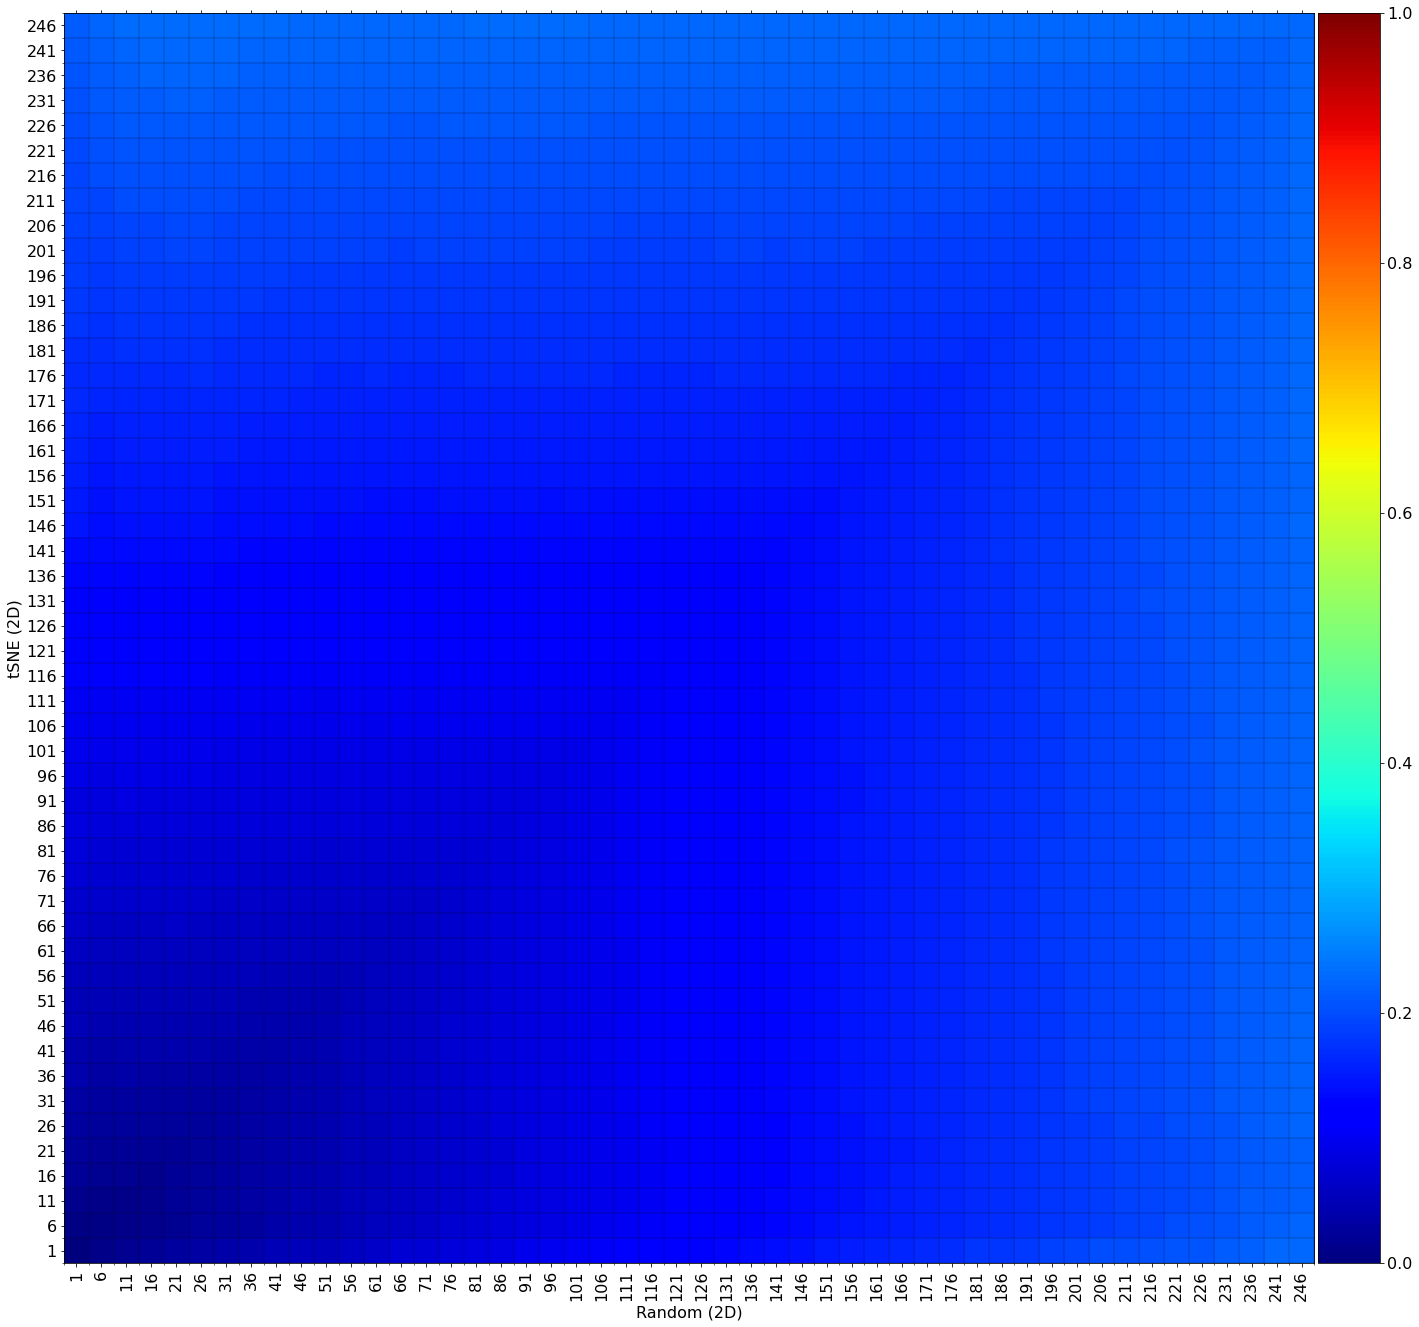

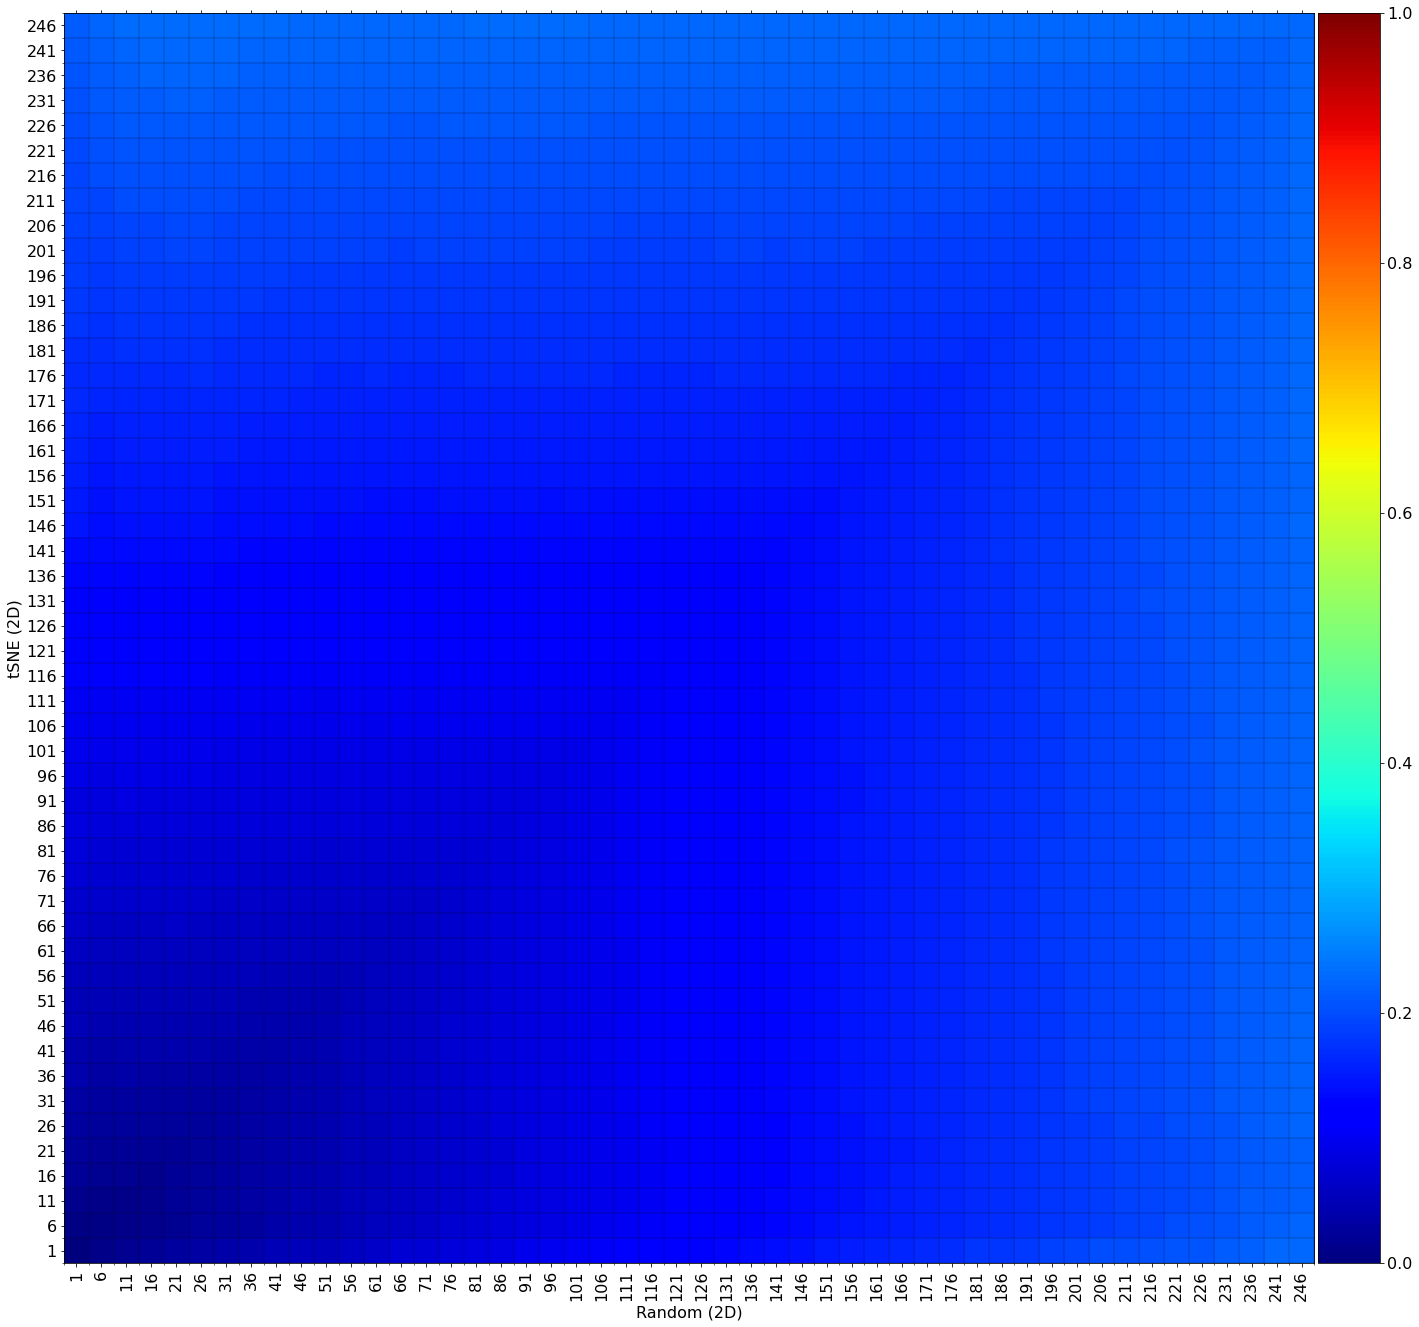

In [12]:
# Quantify PCA vs. tSNE
scores1 = flameplot.compare(map_pca, map_tsne, n_steps=5)
# Quantify UMAP vs. tSNE
scores2 = flameplot.compare(map_umap, map_tsne, n_steps=5)
# Quantify Random vs. tSNE
scores3 = flameplot.compare(map_rand, map_tsne, n_steps=5)

# Plot
flameplot.plot(scores1, xlabel='PCA (50D)', ylabel='tSNE (2D)')
flameplot.plot(scores2, xlabel='UMAP (2D)', ylabel='tSNE (2D)')
flameplot.plot(scores3, xlabel='Random (2D)', ylabel='tSNE (2D)')